In [4]:
from datetime import datetime
from collections import defaultdict
import re
import pickle
import pandas as pd
from netCDF4 import Dataset, num2date #pylint: disable=no-name-in-module
import numpy as np
import numpy.ma as ma

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import scipy.optimize as opt
from scipy.stats import linregress
import seaborn as sn
import cmasher as cmr
import mpl_axes_aligner

import os
import sys
from pathlib import Path
path = Path(os.getcwd())
path_parent=str(path.parent.absolute())
path_module=path_parent+'/src/SuPerSim'
sys.path.insert(0, os.path.abspath(path_module))

from SuPerSim.functions_summary import *
from SuPerSim.pickling import get_all_stats

In [5]:
################################################
# Here, write the paths to your own data files #
################################################

# this is just introduced for convenience
path_data = path_parent+'/examples/data/'

# those are the real variables
path_forcing_merra2 = path_data+'/scaled_merra2_Aksaut.nc'
path_ground = path_data+'South/result_soil_temperature.nc'
path_snow = path_data+'South/result_snow_depth.nc'
path_swe = path_data+'South/result_swe.nc'
path_thaw_depth = path_data+'South/result_thaw_depth.nc'
path_repository = path_data+'South/folder_manifest.csv'
path_pickle = path_parent+'/examples/python_pickles/'

###############################################################
# Enter the parameters of your site and of the rockfall event #
###############################################################

site = 'Aksaut_South'
year_bkg_end = 2010
year_trans_end = 2023
forcing_list = ['merra2']
path_forcing_list = [path_forcing_merra2]
date_event = [2021, 12, 31]
topo_event = []
no_weight = True
consecutive = 7
glacier = False
min_glacier_depth = 100

All good, same order for all lists!
Created a new pickle: df_Aksaut_South.pkl
Created a new pickle: reanalysis_stats_Aksaut_South.pkl
Created a new pickle: list_valid_sim_Aksaut_South.pkl
Created a new pickle: melt_out_Aksaut_South.pkl
Created a new pickle: df_stats_Aksaut_South.pkl
Created a new pickle: rockfall_values_Aksaut_South.pkl
The following plot is a histogram of the distribution of the statistical weights of all simulations:


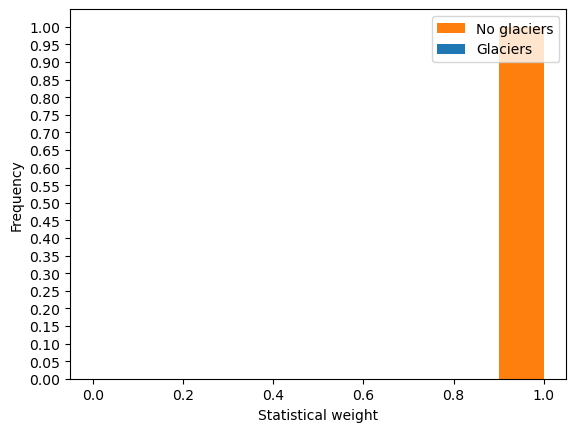

The following plot is a histogram of the distribution of glacier simulations wrt to altitude, aspect, slope, and forcing:
[]
[]
[]
[]


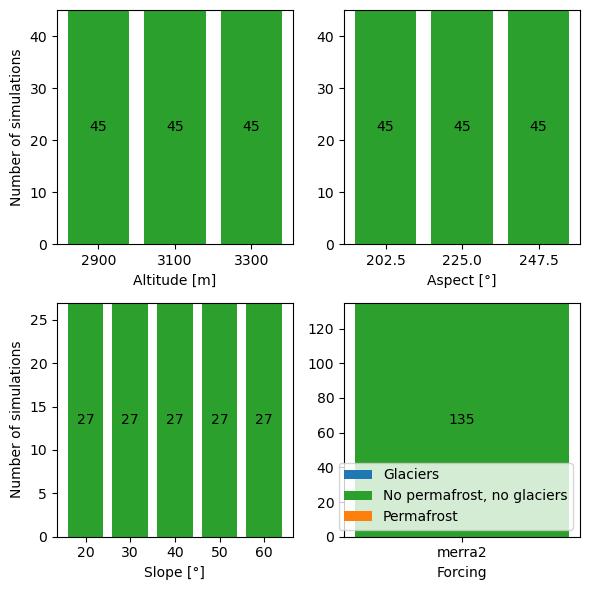

List of altitudes: [2900, 3100, 3300]
Altitude at which we plot the time series: 3100
Plots of the normalized distance of air and ground temperature, water production, and thaw_depth as a function of time
Granularity: week and month side by side


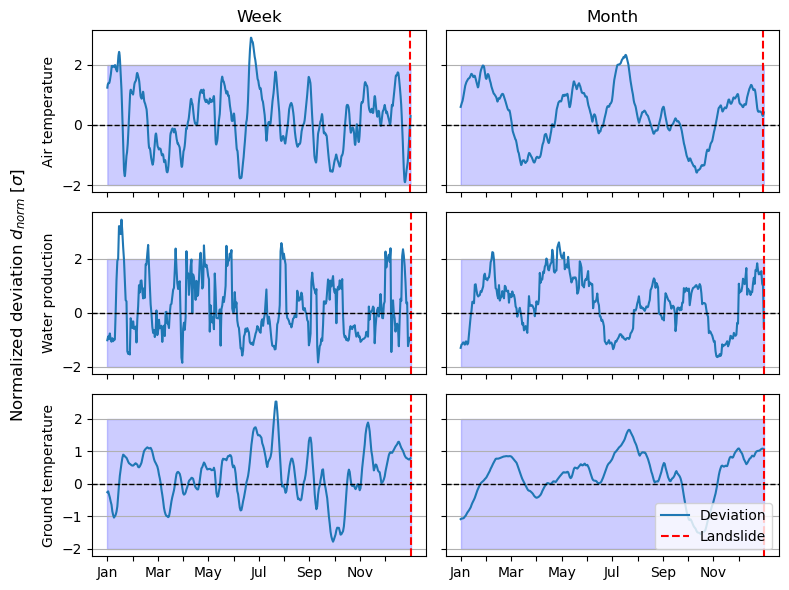

Granularity: year, plotted for all years


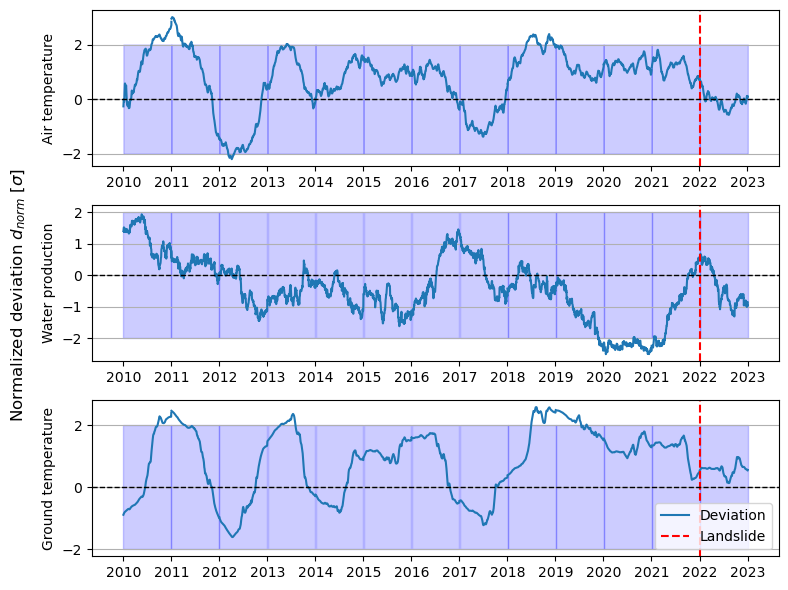

Yearly statistics for air and ground surface temperature, and also precipitation and water production


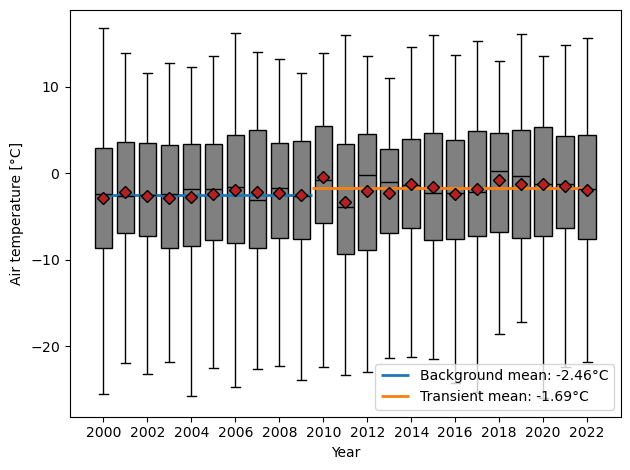

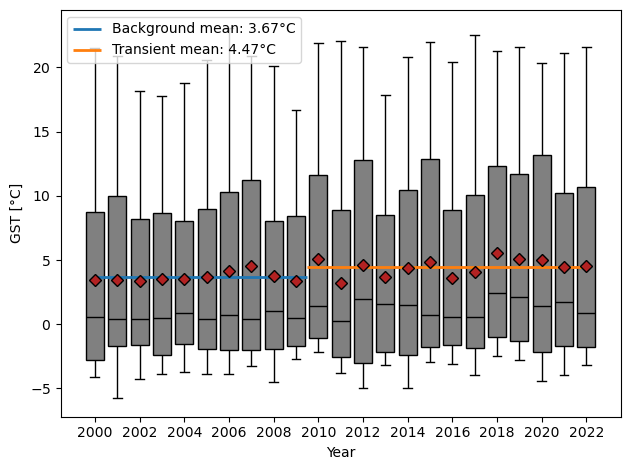

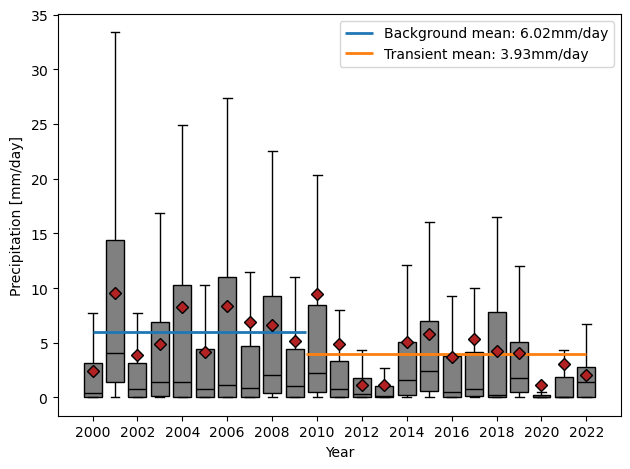

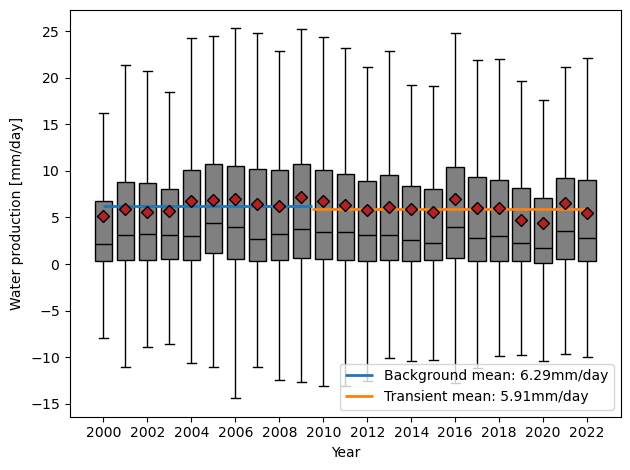

Heatmap of the background mean GST and its evolution as a function of aspect and slope at all altitudes


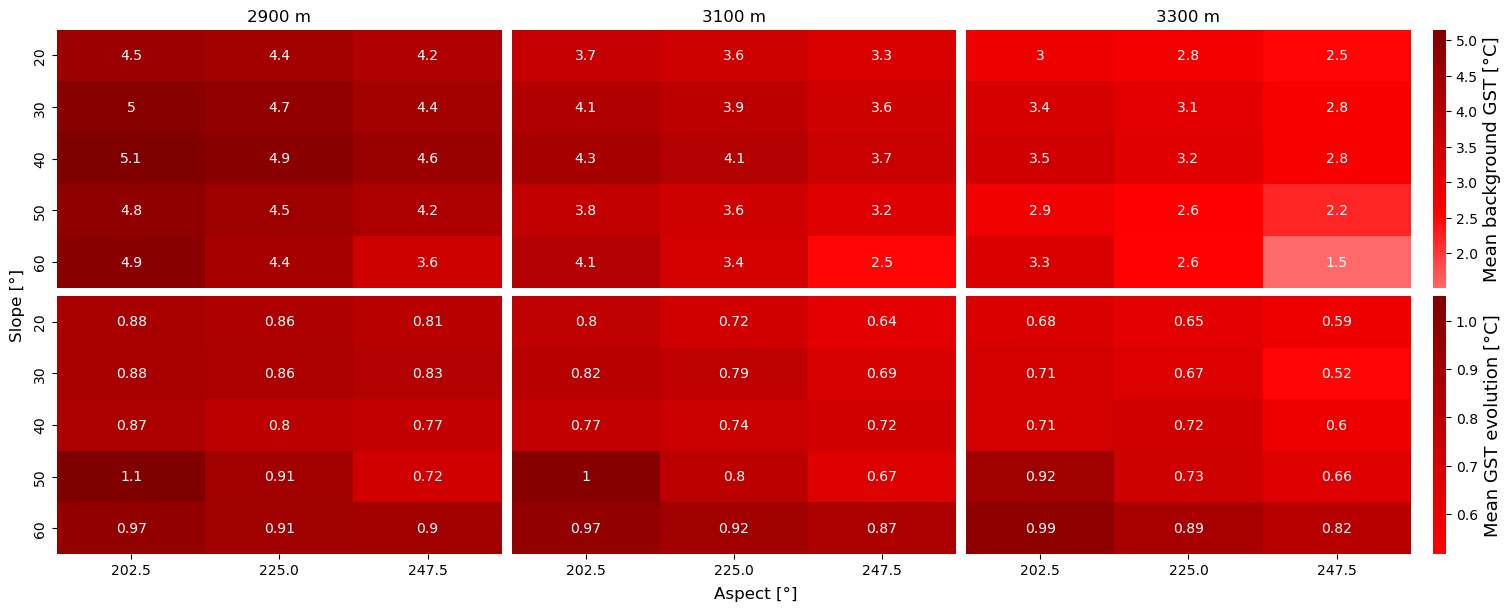

CDF of background, transient, and evolution GST:


<Figure size 640x480 with 0 Axes>

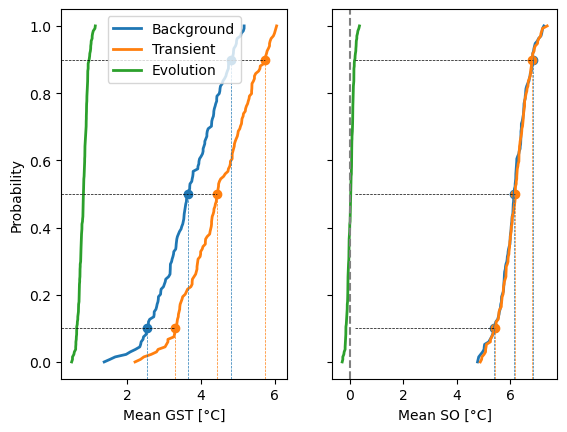

Heatmap of 10th, 25th, 50th, 75th, and 90th percentile in background and transient GST, and the difference:


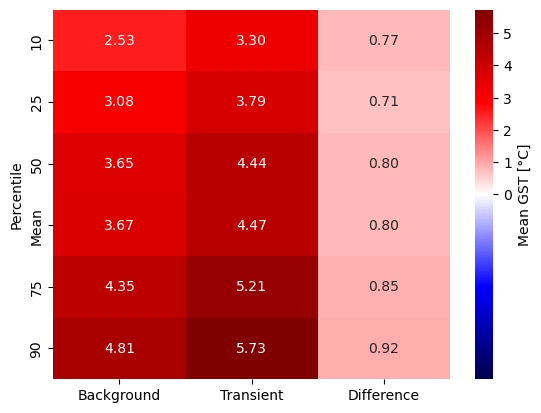

Plot of mean GST evolution vs background GST, with an emphasis on the 10% colder and warmer simulations


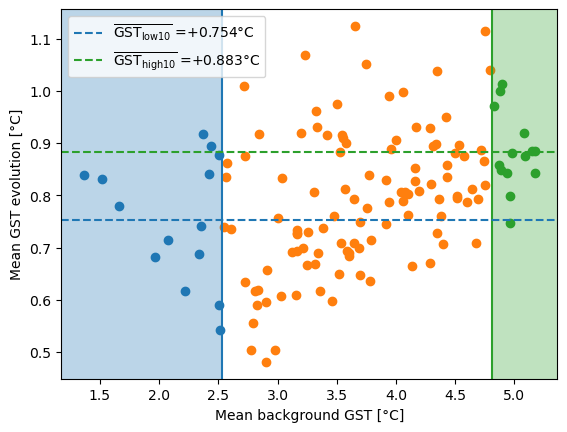

Plot of mean GST evolution vs background GST, fit, and binning per 10% quntiles
R-square: 0.14640458391824318 , regression slope: 0.057807722476505924 , regression intercept: 0.5841357865588372


/fs/yedoma/home/vpo001/VikScriptsTests/SuPerSim/src/evolution.py:70: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(list_x[low:up], list_y[low:up], c=color,s=0.8)
/fs/yedoma/home/vpo001/VikScriptsTests/SuPerSim/src/evolution.py:72: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.mean(list_x[low:up]), np.mean(list_y[low:up]), c=color, s=50)


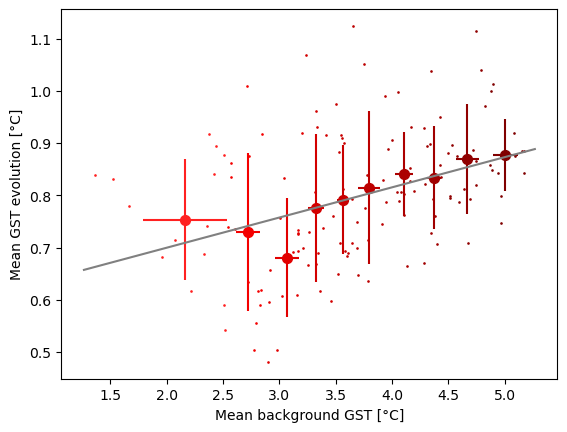

Scatter plot of mean background GST vs evolution of mean GST between the background and transient period
altitude: 2900 , R-square: 0.042029460630198835 , regression slope: 0.04114711287845757 , regression intercept: 0.6818399049331701
altitude: 3100 , R-square: 0.013965552172171233 , regression slope: 0.0286901962635379 , regression intercept: 0.6916660092567558
altitude: 3300 , R-square: 0.001361340588888795 , regression slope: 0.009373848883310663 , regression intercept: 0.697094680462429


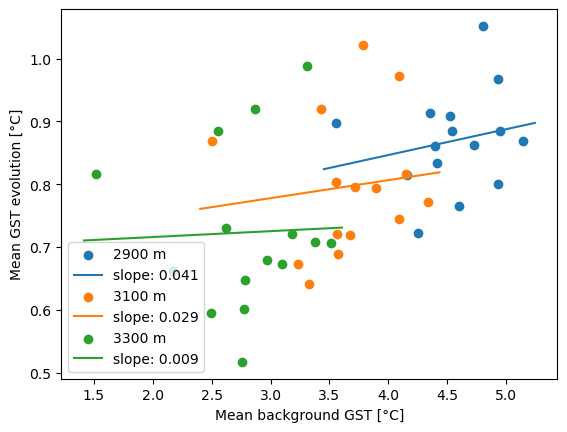

Parity plot (statistically-modeled vs numerically-simulated) of background mean GST:


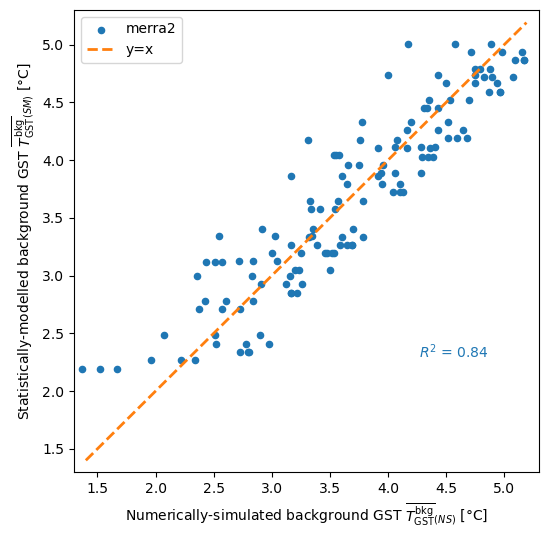

The coefficients of the statistical model for the mean background GST are given by:
  Coefficient       merra2
0      offset    18.349392
1       c_alt    -0.004948
2       d_alt  1426.047980
3       c_asp    -0.000845
4     c_slope    -0.007210
Plot of yearly statistics for atmospheric timeseries. Mean and several quantiles for each year:


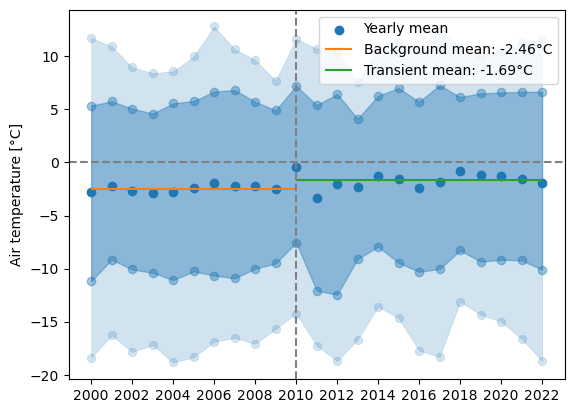

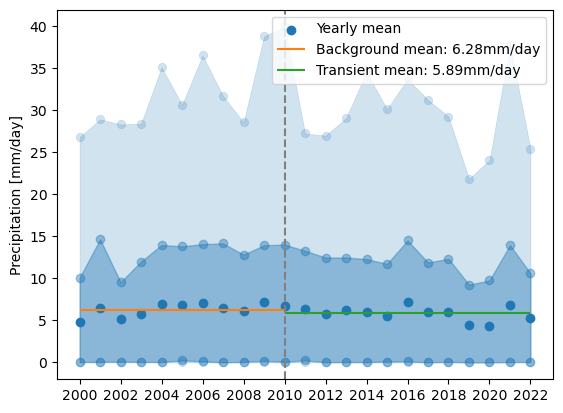

Plot of yearly statistics for simulated timeseries. Mean and several quantiles for each year:


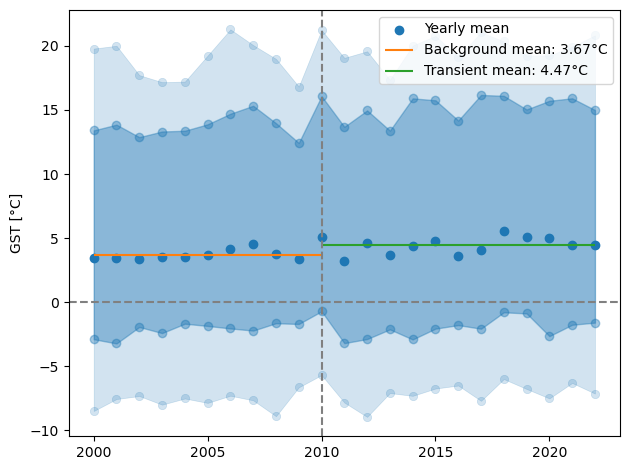

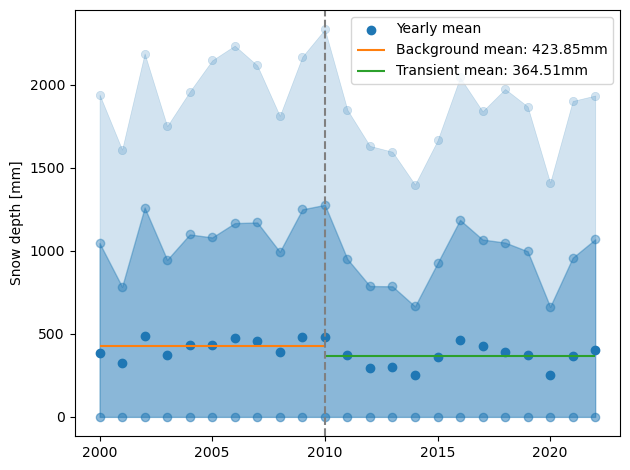

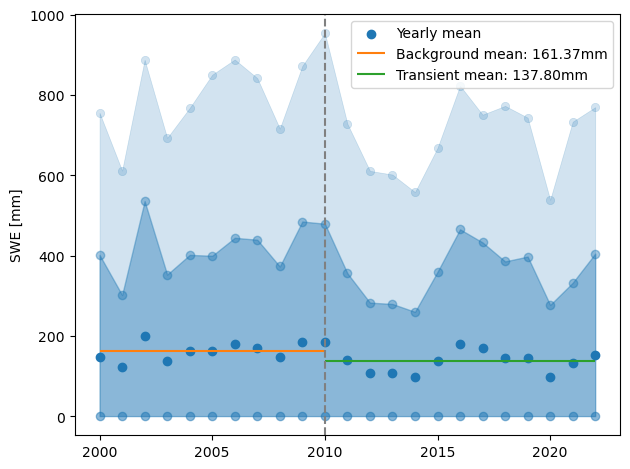

Histogram of the evolution of the snow cover (in days) and melt-out date:


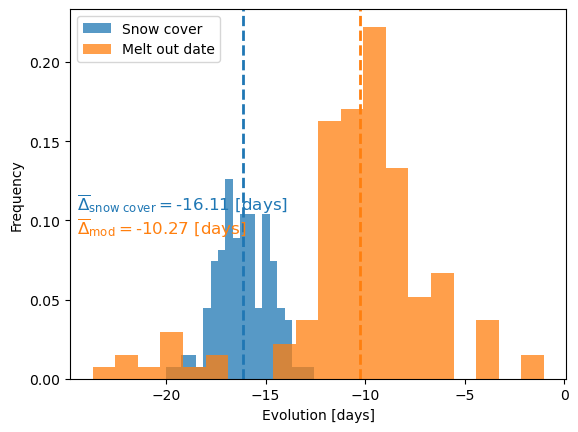

Plot of 2 timeseries reduced to a 1-year window with mean and 1- and 2-sigma spread:


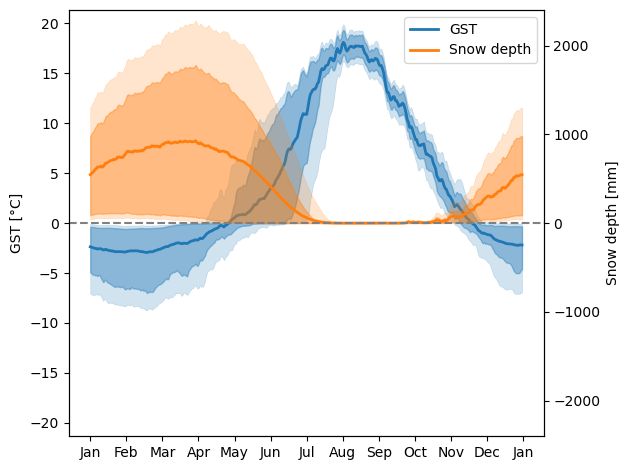

Plot of a single timeseries reduced to a 1-year window with mean and 1 and 2-sigma spread, for background and transient piods:


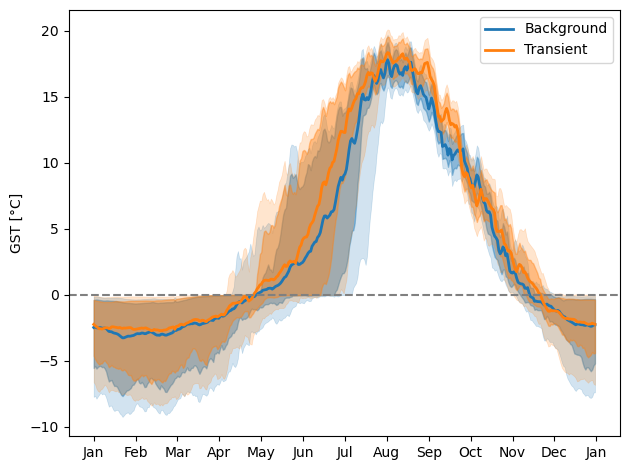

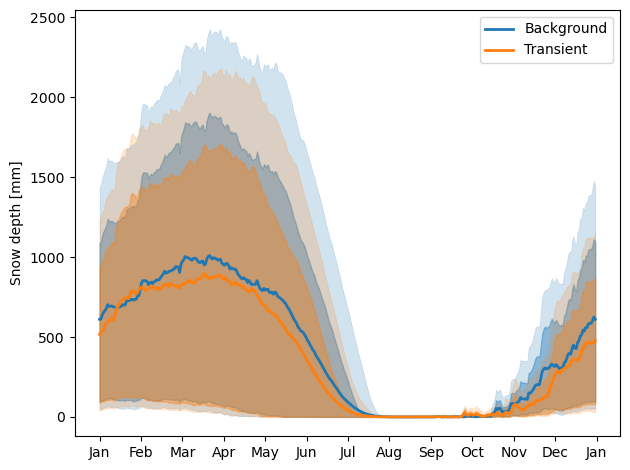

All done!


In [6]:
###############
# Ready to go #
###############

# When used for the first time, it createss the pickles
# When the pickles already exist, it simply loads them
# but it's easier to use the function 'load_all_pickles' for that
df, reanalysis_stats, list_valid_sim, dict_melt_out, stats_melt_out_dic, df_stats, rockfall_values = get_all_stats(
    forcing_list, path_forcing_list, path_repository, path_ground, path_snow, path_pickle,
    year_bkg_end, year_trans_end, consecutive,
    site, date_event, topo_event,
    glacier, min_glacier_depth)

# this is a function that allows the used to load the pickles in a much simpler way
df, reanalysis_stats, list_valid_sim, dict_melt_out, stats_melt_out_dic, df_stats, rockfall_values = load_all_pickles(site, path_pickle)

# Finally, we can produce all the summary plots
plot_all(site, forcing_list, path_forcing_list, path_ground, path_snow, path_swe, path_thaw_depth, path_pickle,
         year_bkg_end, year_trans_end, path_horizon=None, no_weight=True,
         individual_heatmap=False, polar_plots=False, parity_plot=True)